In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/adult_2015_2019_vars_interest.csv")

print(df.shape)
df.head()

(106579, 137)


,AF66,AJ32,AB17,AB34,AG10,AG11,AG22,AH33NEW,AH34NEW,AH35NEW,...,RAKEDW79,RAKEDW80,AK22_P1,RACEHP2_P1,AH130,AH85B,AE_FRUIT,AE_VEGI,UR_CLRT6,UR_BG6
0,-1,5,2,2,-1,-1,2,1,1,1,...,3573.399412,3504.779624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,5,2,2,-1,-1,2,1,2,1,...,1362.138646,1319.009122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,5,2,2,-1,-1,2,1,1,1,...,7998.735688,7943.402204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,5,2,2,-1,-1,1,1,1,1,...,200.410470,203.312046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1,3,2,1,-1,2,1,1,1,1,...,1071.817056,1022.702132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 299 observations removed
X = df[df["AJ32"] >= 0]

X.shape

(106280, 137)

In [110]:
df.groupby("YEAR_NAME")['YEAR_NAME'].count().sum()

106579

In [26]:
AJ_cols = ["AJ29", "AJ30", "AJ31", "AJ32", "AJ33", "AJ34"]

df_AJ_table = pd.DataFrame()

for col in AJ_cols:
    df_AJ_score = X.groupby(["YEAR_NAME", col])[col].count().reset_index(name="count")
    
    df_AJ_score.columns = ["YEAR_NAME", "VALUE", col]

    # check if dataframe is empty
    if df_AJ_table.empty:
        df_AJ_table = df_AJ_score
    else:
        df_AJ_table = pd.merge(df_AJ_table, df_AJ_score, on=["YEAR_NAME", "VALUE"])    


df_AJ_table



,YEAR_NAME,VALUE,AJ29,AJ30,AJ31,AJ32,AJ33,AJ34
0,2015,1,399,201,537,159,1070,207
1,2015,2,865,322,737,351,992,300
2,2015,3,3756,1534,3646,1293,3087,1112
3,2015,4,6752,3014,5074,2319,3994,1683
4,2015,5,9127,15828,10905,16777,11756,17597
5,2016,1,401,191,500,168,942,188
6,2016,2,816,349,681,314,956,291
7,2016,3,3808,1601,3554,1416,3039,1093
8,2016,4,6600,2986,5009,2378,3912,1645
9,2016,5,9291,15789,11172,16640,12067,17699


In [49]:
table_2015 = df_AJ_table[df_AJ_table['YEAR_NAME'] == 2015].iloc[:,1:].T

# use first row as column names
table_2015.columns = table_2015.iloc[0]

table_2015 = table_2015.iloc[1:]

pop_2015 = 20899

# divide each row by total population
table_2015 = table_2015.apply(lambda x: x/pop_2015*100)
table_2015.round(2)

VALUE,1,2,3,4,5
AJ29,1.91,4.14,17.97,32.31,43.67
AJ30,0.96,1.54,7.34,14.42,75.74
AJ31,2.57,3.53,17.45,24.28,52.18
AJ32,0.76,1.68,6.19,11.10,80.28
AJ33,5.12,4.75,14.77,19.11,56.25
AJ34,0.99,1.44,5.32,8.05,84.20


In [51]:
table_2019 = df_AJ_table[df_AJ_table['YEAR_NAME'] == 2019].iloc[:,1:].T

# use first row as column names
table_2019.columns = table_2019.iloc[0]

table_2019 = table_2019.iloc[1:]

pop_2019 = 22152

# divide each row by total population
table_2019 = table_2019.apply(lambda x: x/pop_2019*100)
table_2019.round(2)

VALUE,1,2,3,4,5
AJ29,1.15,4.29,20.02,37.27,37.27
AJ30,0.65,2.33,8.98,16.66,71.37
AJ31,1.16,4.01,16.79,29.89,48.15
AJ32,0.48,1.84,6.41,13.44,77.83
AJ33,1.86,4.99,12.08,24.65,56.43
AJ34,0.87,1.85,5.35,11.57,80.36


In [98]:
# calculate percent change difference between table_2015 and table_2019
table_2015_2019 = ((table_2019 - table_2015)/table_2015*100).round(2)

table_2015_2019

VALUE,1,2,3,4,5
AJ29,-39.71,3.61,11.37,15.36,-14.65
AJ30,-31.94,51.48,22.39,15.53,-5.77
AJ31,-55.02,13.67,-3.77,23.13,-7.72
AJ32,-36.51,9.40,3.61,21.15,-3.05
AJ33,-63.76,5.19,-18.25,28.97,0.31
AJ34,-12.49,28.62,0.62,43.67,-4.56


In [99]:
# combine each cell from table_2019 and table_2015_2019 as a string
final_table = table_2019.round(2).astype(str) + '%' + " (" + table_2015_2019.astype(str) + "%)"

final_table = final_table.rename(columns={
    1: "1: All of the time",
    2: "2: Most",
    3: "3: Some",
    4: "4: A little",
    5: "5: Not at all" 
    })

final_table

VALUE,1: All of the time,2: Most,3: Some,4: A little,5: Not at all
AJ29,1.15% (-39.71%),4.29% (3.61%),20.02% (11.37%),37.27% (15.36%),37.27% (-14.65%)
AJ30,0.65% (-31.94%),2.33% (51.48%),8.98% (22.39%),16.66% (15.53%),71.37% (-5.77%)
AJ31,1.16% (-55.02%),4.01% (13.67%),16.79% (-3.77%),29.89% (23.13%),48.15% (-7.72%)
AJ32,0.48% (-36.51%),1.84% (9.4%),6.41% (3.61%),13.44% (21.15%),77.83% (-3.05%)
AJ33,1.86% (-63.76%),4.99% (5.19%),12.08% (-18.25%),24.65% (28.97%),56.43% (0.31%)
AJ34,0.87% (-12.49%),1.85% (28.62%),5.35% (0.62%),11.57% (43.67%),80.36% (-4.56%)


In [100]:
# replace "%" for "\%" for each cell in final_table
print(final_table.applymap(lambda x: x.replace("%", "")).to_latex())

\begin{tabular}{llllll}
\toprule
VALUE & 1: All of the time & 2: Most & 3: Some & 4: A little & 5: Not at all \\
\midrule
AJ29 & 1.15 (-39.71) & 4.29 (3.61) & 20.02 (11.37) & 37.27 (15.36) & 37.27 (-14.65) \\
AJ30 & 0.65 (-31.94) & 2.33 (51.48) & 8.98 (22.39) & 16.66 (15.53) & 71.37 (-5.77) \\
AJ31 & 1.16 (-55.02) & 4.01 (13.67) & 16.79 (-3.77) & 29.89 (23.13) & 48.15 (-7.72) \\
AJ32 & 0.48 (-36.51) & 1.84 (9.4) & 6.41 (3.61) & 13.44 (21.15) & 77.83 (-3.05) \\
AJ33 & 1.86 (-63.76) & 4.99 (5.19) & 12.08 (-18.25) & 24.65 (28.97) & 56.43 (0.31) \\
AJ34 & 0.87 (-12.49) & 1.85 (28.62) & 5.35 (0.62) & 11.57 (43.67) & 80.36 (-4.56) \\
\bottomrule
\end{tabular}



In [94]:
print(final_table.to_latex())

\begin{tabular}{llllll}
\toprule
VALUE & 1: All of the time & 2: Most & 3: Some & 4: A little & 5: Not at all \\
\midrule
AJ29 & 1.15% (-65.85%) & 4.29% (3.49%) & 20.02% (10.21%) & 37.27% (13.31%) & 37.27% (-17.16%) \\
AJ30 & 0.65% (-46.93%) & 2.33% (33.98%) & 8.98% (18.29%) & 16.66% (13.45%) & 71.37% (-6.12%) \\
AJ31 & 1.16% (-122.34%) & 4.01% (12.03%) & 16.79% (-3.91%) & 29.89% (18.78%) & 48.15% (-8.36%) \\
AJ32 & 0.48% (-57.51%) & 1.84% (8.59%) & 6.41% (3.48%) & 13.44% (17.46%) & 77.83% (-3.15%) \\
AJ33 & 1.86% (-175.95%) & 4.99% (4.93%) & 12.08% (-22.32%) & 24.65% (22.46%) & 56.43% (0.31%) \\
AJ34 & 0.87% (-14.28%) & 1.85% (22.25%) & 5.35% (0.62%) & 11.57% (30.4%) & 80.36% (-4.77%) \\
\bottomrule
\end{tabular}



\begin{tabular}{llllll}
\toprule
\multicolumn{6}{c}{2019 respondents percentage (percent change compared to 2015)} \\
 & 1: All of the time & 2: Most & 3: Some & 4: A little & 5: Not at all \\
\midrule
AJ29 & 1.15 (-39.71) & 4.29 (3.61) & 20.02 (11.37) & 37.27 (15.36) & 37.27 (-14.65) \\
AJ30 & 0.65 (-31.94) & 2.33 (51.48) & 8.98 (22.39) & 16.66 (15.53) & 71.37 (-5.77) \\
AJ31 & 1.16 (-55.02) & 4.01 (13.67) & 16.79 (-3.77) & 29.89 (23.13) & 48.15 (-7.72) \\
AJ32 & 0.48 (-36.51) & 1.84 (9.4) & 6.41 (3.61) & 13.44 (21.15) & 77.83 (-3.05) \\
AJ33 & 1.86 (-63.76) & 4.99 (5.19) & 12.08 (-18.25) & 24.65 (28.97) & 56.43 (0.31) \\
AJ34 & 0.87 (-12.49) & 1.85 (28.62) & 5.35 (0.62) & 11.57 (43.67) & 80.36 (-4.56) \\
\bottomrule
\end{tabular}

In [102]:
aj_dict ={
    "AJ29": "Feel nervous past 30 days",
    "AJ30": "Feel hopeless past 30 days",
    "AJ31": "Felt restless past 30 days",
    "AJ32": "Feel depressed past 30 days",
    "AJ33": "Feel everything is an effort past 30 days",
    "AJ34": "Feel worthless past 30 days"
}

# create a dataframe based on the aj_dict
df_AJ_dict = pd.DataFrame.from_dict(aj_dict, orient='index', columns=['Question'])

print(df_AJ_dict.to_latex())

\begin{tabular}{ll}
\toprule
 & Question \\
\midrule
AJ29 & Feel nervous past 30 days \\
AJ30 & Feel hopeless past 30 days \\
AJ31 & Felt restless past 30 days \\
AJ32 & Feel depressed past 30 days \\
AJ33 & Feel everything is an effort past 30 days \\
AJ34 & Feel worthless past 30 days \\
\bottomrule
\end{tabular}



In [103]:
distress_dict = {
    "Value (AJ29 - AJ34)": "Assigned score",
    "1: All of the time": "4",
    "2: Most of the time": "3",
    "3: Some of the time": "2",
    "4: A little of the time": "1",
    "5: Not at all": "0"
}

df_distress_dict = pd.DataFrame.from_dict(distress_dict, 
                                          orient='index', 
                                          columns=['Distress score'])

print(df_distress_dict.to_latex())

\begin{tabular}{ll}
\toprule
 & Distress score \\
\midrule
Value (AJ29 - AJ34) & Assigned score \\
1: All of the time & 4 \\
2: Most of the time & 3 \\
3: Some of the time & 2 \\
4: A little of the time & 1 \\
5: Not at all & 0 \\
\bottomrule
\end{tabular}



In [84]:
X[X['DISTRESS'] < 5].shape[0]/X.shape[0]

0.7093902898005269

<Axes: ylabel='DISTRESS'>

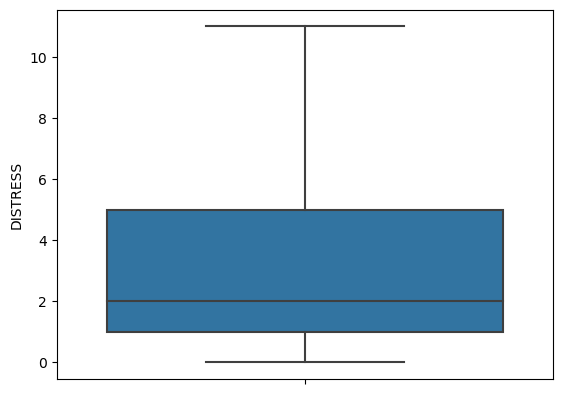

In [87]:
# plot boxplot of DISTRESS with outliers
sns.boxplot(y=X['DISTRESS'], showfliers=False)

<Axes: xlabel='DISTRESS', ylabel='Count'>

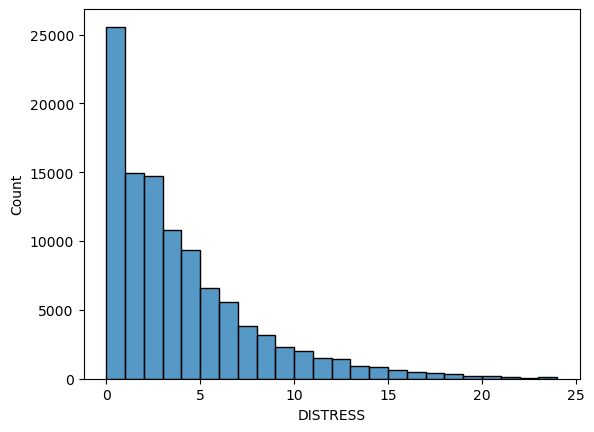

In [88]:
sns.histplot(data=X, x="DISTRESS", bins=24)

In [112]:
X['SRAGE_P1'].value_counts(normalize=True)

SRAGE_P1
65    0.112138
60    0.110868
55    0.094816
70    0.093207
18    0.082593
50    0.079535
75    0.069816
45    0.063003
40    0.053321
35    0.052531
30    0.051769
80    0.050038
85    0.047676
26    0.038690
Name: proportion, dtype: float64

In [6]:
X = pd.read_csv("data/adult_2015_2019_vars_interest_final.csv")

X.head()

/tmp/ipykernel_1025/2338677344.py:1: DtypeWarning: Columns (136,147) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv("data/adult_2015_2019_vars_interest_final.csv")


,AF66,AJ32,AB17,AB34,AG10,AG11,AG22,AH33NEW,AH34NEW,AH35NEW,...,Age,Education,Smoked100,BornUS,FeelSafe,Overweight,Sex,UrbanRural,Race,UrbanRural6
0,-1,5,2,2,-1,-1,2,Yes,1,1,...,18-29,SomeCollege/Bachelor,No,Yes,NaN,Yes,Male,Urban,AfricanAmerican,NaN
1,-1,5,2,2,-1,-1,2,Yes,2,1,...,85+,HighSchool,Yes,Yes,Most_time,No,Female,Urban,White,NaN
2,-1,5,2,2,-1,-1,2,Yes,1,1,...,45-64,HighSchool,No,Yes,Most_time,Yes,Female,Urban,White,NaN
3,-1,5,2,2,-1,-1,1,Yes,1,1,...,65-84,SomeCollege/Bachelor,Yes,Yes,Most_time,Yes,Male,Urban,White,NaN
4,-1,3,2,1,-1,2,1,Yes,1,1,...,65-84,SomeCollege/Bachelor,No,Yes,All_time,Yes,Male,Urban,White,NaN


In [25]:
# print(X.groupby(["UrbanRural", "UrbanRural6"]).agg({'UrbanRural6': 'count'}).to_latex())

# groupby UrbanRural and UrbanRural6 and get the proportion of each group




df_table = X.groupby(["UrbanRural", "UrbanRural6"]).agg({'UrbanRural6': 'count'})


df_rural = pd.DataFrame({'Category': ['2ndCity', 'Mixed', 'Rural', 'Suburban', 'Town'],
        'Count': [570, 1115, 4249, 171, 3620]})

# Calculate percentage
df_rural['Percentage'] = (df_rural['Count'] / df_rural['Count'].sum()) * 100


df_urban = pd.DataFrame({'Category': ['2ndCity', 'Mixed', 'Rural', 'Suburban', 'Town', 'Urban'],
        'Count': [4023, 10012, 2316, 11747, 4246, 22396]})

# Calculate percentage
df_urban['Percentage'] = (df_urban['Count'] / df_urban['Count'].sum()) * 100

# concatenate df_rural and df_urban
df_rural_urban = pd.concat([df_rural, df_urban])

# add df_rural_urban percentage to df_table
df_table['Percentage'] = df_rural_urban['Percentage'].values.round(2)

# create a new column with string values as UrbanRural6 (Percentage %)
df_table['UrbanRural6 (Percentage %)'] = df_table['UrbanRural6'].astype(str) + " (" + df_table['Percentage'].astype(str) + "\%)"

# create latex table with df_table and UrbanRural6 (Percentage %) as columns
print(df_table[['UrbanRural6 (Percentage %)']].to_latex())


\begin{tabular}{lll}
\toprule
 &  & UrbanRural6 (Percentage %) \\
UrbanRural & UrbanRural6 &  \\
\midrule
\multirow[t]{5}{*}{Rural} & 2ndCity & 570 (5.86\%) \\
 & Mixed & 1115 (11.47\%) \\
 & Rural & 4249 (43.69\%) \\
 & Suburban & 171 (1.76\%) \\
 & Town & 3620 (37.22\%) \\
\cline{1-3}
\multirow[t]{6}{*}{Urban} & 2ndCity & 4023 (7.35\%) \\
 & Mixed & 10012 (18.29\%) \\
 & Rural & 2316 (4.23\%) \\
 & Suburban & 11747 (21.46\%) \\
 & Town & 4246 (7.76\%) \\
 & Urban & 22396 (40.91\%) \\
\cline{1-3}
\bottomrule
\end{tabular}



In [27]:

urban = [4023, 10012, 2316, 11747, 4246, 22396]

rural = [570, 1115, 4249, 171, 3620]

sum(urban) / (sum(urban) + sum(rural))


0.8491429457845342